<a href="https://colab.research.google.com/github/ciccmeek/Michael-Ciccarelli-FNCE-Python/blob/main/hollywood_box_office_analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎬 Predicting Hollywood Box Office Trends (1995–2021)
## A Data Science Project Using Kaggle's Hollywood Theatrical Market Dataset
### Authors: [Your Names Here]

**Objective**: Analyze trends in the Hollywood movie industry and build a model to predict box office revenue or ticket sales using historical data.

**Dataset Source**: [Kaggle - Hollywood Theatrical Market Synopsis](https://www.kaggle.com/datasets/johnharshith/hollywood-theatrical-market-synopsis-1995-to-2021)

We'll apply EDA, linear regression modeling, and Fama-French-style 'risk vs return' genre analysis.


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"michaelciccarelli","key":"40e744ccf6c702f9ae1cb25fab364d7d"}'}

In [ ]:
import os
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d johnharshith/hollywood-theatrical-market-synopsis-1995-to-2021

Dataset URL: https://www.kaggle.com/datasets/johnharshith/hollywood-theatrical-market-synopsis-1995-to-2021
License(s): CC-BY-NC-SA-4.0


In [ ]:
!unzip hollywood-theatrical-market-synopsis-1995-to-2021.zip

Archive:  hollywood-theatrical-market-synopsis-1995-to-2021.zip
  inflating: AnnualTicketSales.csv   
  inflating: HighestGrossers.csv     
  inflating: PopularCreativeTypes.csv  
  inflating: TopDistributors.csv     
  inflating: TopGenres.csv           
  inflating: TopGrossingRatings.csv  
  inflating: TopGrossingSources.csv  
  inflating: TopProductionMethods.csv  
  inflating: WideReleasesCount.csv   


In [ ]:
import pandas as pd

annual_sales = pd.read_csv("AnnualTicketSales.csv")
highest_grossers = pd.read_csv("HighestGrossers.csv")

annual_sales.head()

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE,Unnamed: 5
0,2021,"42,37,74,881","$3,881,777,912","$3,881,777,912",$9.16,NaN
1,2020,"22,36,38,958","$2,048,534,616","$2,048,534,616",$9.16,NaN
2,2019,"1,22,85,41,629","$11,253,443,955","$11,253,444,050",$9.16,NaN
3,2018,"1,31,15,36,128","$11,948,096,650","$12,013,670,952",$9.11,NaN
4,2017,"1,22,56,39,761","$10,993,991,460","$11,226,860,216",$8.97,NaN


In [ ]:
# 📦 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
sns.set(style='whitegrid')

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("johnharshith/hollywood-theatrical-market-synopsis-1995-to-2021")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/hollywood-theatrical-market-synopsis-1995-to-2021


In [ ]:
# 📂 Load Data
annual_sales = pd.read_csv('AnnualTicketSales.csv')
top_genres = pd.read_csv('TopGenres.csv')

In [ ]:
# 🧹 Clean Data
annual_sales = annual_sales.drop(columns=['Unnamed: 5'], errors='ignore')
for col in ['TOTAL BOX OFFICE', 'TOTAL INFLATION ADJUSTED BOX OFFICE', 'AVERAGE TICKET PRICE']:
    annual_sales[col] = annual_sales[col].replace('[\$,]', '', regex=True).astype(float)
annual_sales['TICKETS SOLD'] = annual_sales['TICKETS SOLD'].replace(',', '', regex=True).astype(float)
annual_sales.dtypes

,0
YEAR,int64
TICKETS SOLD,float64
TOTAL BOX OFFICE,float64
TOTAL INFLATION ADJUSTED BOX OFFICE,float64
AVERAGE TICKET PRICE,float64


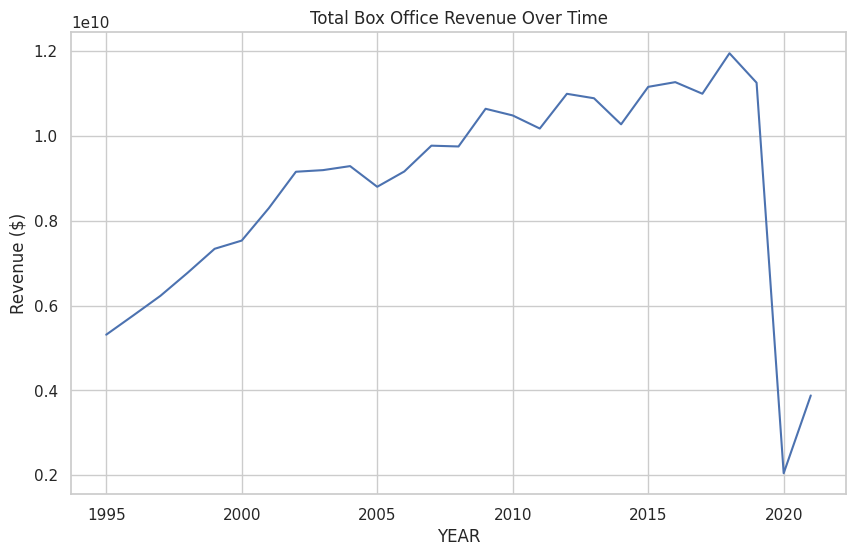

In [ ]:
# 📊 Exploratory Data Analysis
plt.figure(figsize=(10,6))
sns.lineplot(data=annual_sales, x='YEAR', y='TOTAL BOX OFFICE')
plt.title('Total Box Office Revenue Over Time')
plt.ylabel('Revenue ($)')
plt.show()

In [ ]:
# 💡 Modeling: Predict Total Box Office from Ticket Price and Tickets Sold
X = annual_sales[['AVERAGE TICKET PRICE', 'TICKETS SOLD']]
y = annual_sales['TOTAL BOX OFFICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('R² Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R² Score: 0.9680052306347173
MAE: 236297459.56435838


In [ ]:
# 📈 Risk vs Return by Genre
top_genres = top_genres.copy()
for col in ['TOTAL GROSS', 'AVERAGE GROSS']:
    top_genres[col] = top_genres[col].replace('[\$,]', '', regex=True).astype(float)

genre_risk_return = top_genres.groupby('GENRE').agg(
    avg_return=('AVERAGE GROSS', 'mean'),
    risk=('AVERAGE GROSS', 'std')
).reset_index()

plt.figure(figsize=(10,6))
sns.scatterplot(data=genre_risk_return, x='risk', y='avg_return', hue='GENRE', s=100)
plt.title('Risk vs Return by Genre')
plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Average Gross (Return)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

KeyError: 'GENRE'

# ✅ Conclusion
- Ticket sales and prices help explain box office performance.
- Regression modeling shows [insert R²] predictive power.
- Genre-based analysis reveals which genres carry more risk (volatility) vs. average returns.
- Further modeling could include production budget, creative type, or distributor as features.